## Lab 2: Intro to Social Network Analysis
Name: Hieu Bui - 2207854

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the edges
def load_graph(edge_file):
    edges = pd.read_csv(edge_file, header=None, names=["source", "target"])
    G = nx.DiGraph()
    G.add_edges_from(edges.values)
    return G

# Load the graph
G = load_graph("edges.csv")

in_degree_centrality = nx.in_degree_centrality(G)

#Get the 100 nodes with the highest in-degree centrality
top_100_nodes = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:100]

print(top_100_nodes)
top_100_node_ids = [node for node, _ in top_100_nodes]

# Create subgraph containing only the top 100 nodes and the edges between them
G = G.subgraph(top_100_node_ids).copy()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# Identify the node with the highest degree
highest_degree_node = max(G.degree, key=lambda x: x[1])[0]

[('24904', 0.003429743299625203), ('24069', 0.003252952407891945), ('24061', 0.0028286542677321263), ('25329', 0.0026165051976522165), ('27867', 0.002581147019305565), ('21798', 0.0024750724842656103), ('24127', 0.002439714305918959), ('24062', 0.002404356127572307), ('23932', 0.002404356127572307), ('23143', 0.002404356127572307), ('27821', 0.0022982815925323527), ('21438', 0.0022982815925323527), ('17963', 0.0022982815925323527), ('24122', 0.002262923414185701), ('24104', 0.002156848879145746), ('22581', 0.002086132522452443), ('20162', 0.002086132522452443), ('22425', 0.002086132522452443), ('26503', 0.0019446998090658367), ('27042', 0.0019446998090658367), ('27795', 0.0019093416307191852), ('22416', 0.0018739834523725336), ('18669', 0.0018739834523725336), ('27221', 0.001838625274025882), ('25468', 0.001838625274025882), ('23619', 0.0018032670956792305), ('16276', 0.0018032670956792305), ('24005', 0.0018032670956792305), ('24659', 0.001767908917332579), ('28211', 0.0017325507389859

In [20]:
# a) Visualizing with Gephi (exporting graph for Gephi use)
nx.write_gexf(G, "graph.gexf")
print(f"Graph exported to graph.gexf. Highest degree node: {highest_degree_node}")

Graph exported to graph.gexf. Highest degree node: 23932


In [21]:
# # b) Find connected components
# components = list(nx.connected_components(G))
# component_sizes = [len(comp) for comp in components]

# print("Connected components sizes:")
# for i, size in enumerate(component_sizes):
#     print(f"Component {i+1}: {size} nodes")

# # Find the largest component
# largest_component_nodes = max(components, key=len)
# G_largest = G.subgraph(largest_component_nodes)

# For a directed graph (DiGraph)
# Use weakly connected components to find components ignoring direction
components = list(nx.weakly_connected_components(G))
component_sizes = [len(comp) for comp in components]

print("Connected components sizes (weakly connected):")
for i, size in enumerate(component_sizes):
    print(f"Component {i+1}: {size} nodes")

# Find the largest component
largest_component_nodes = max(components, key=len)
G_largest = G.subgraph(largest_component_nodes).copy()

# You can now visualize or analyze G_largest


Connected components sizes (weakly connected):
Component 1: 1 nodes
Component 2: 43 nodes
Component 3: 2 nodes
Component 4: 29 nodes
Component 5: 1 nodes
Component 6: 1 nodes
Component 7: 1 nodes
Component 8: 2 nodes
Component 9: 3 nodes
Component 10: 1 nodes
Component 11: 2 nodes
Component 12: 1 nodes
Component 13: 1 nodes
Component 14: 1 nodes
Component 15: 1 nodes
Component 16: 1 nodes
Component 17: 1 nodes
Component 18: 1 nodes
Component 19: 1 nodes
Component 20: 1 nodes
Component 21: 1 nodes
Component 22: 1 nodes
Component 23: 1 nodes
Component 24: 1 nodes
Component 25: 1 nodes


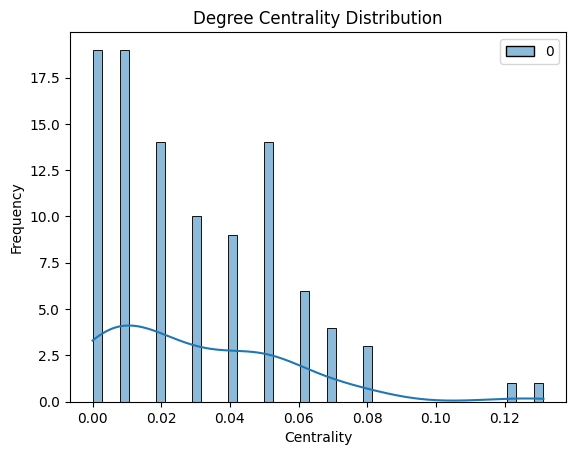

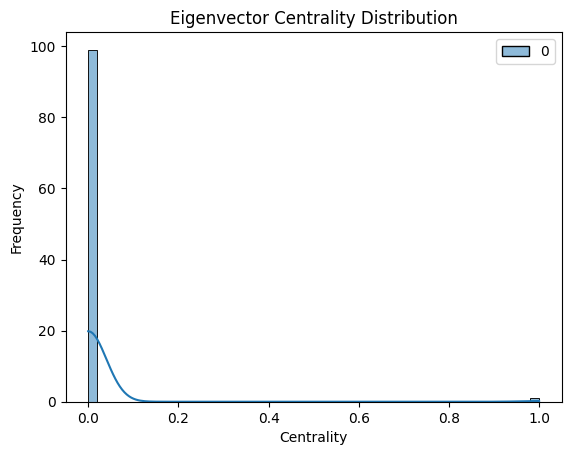

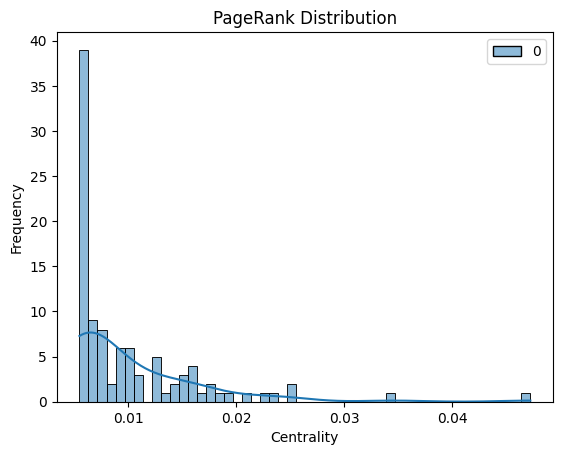

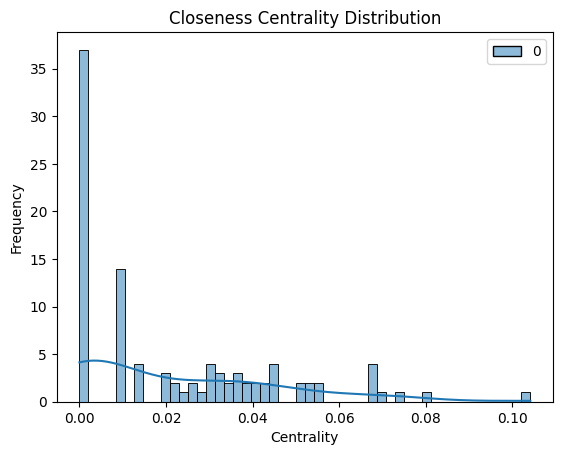

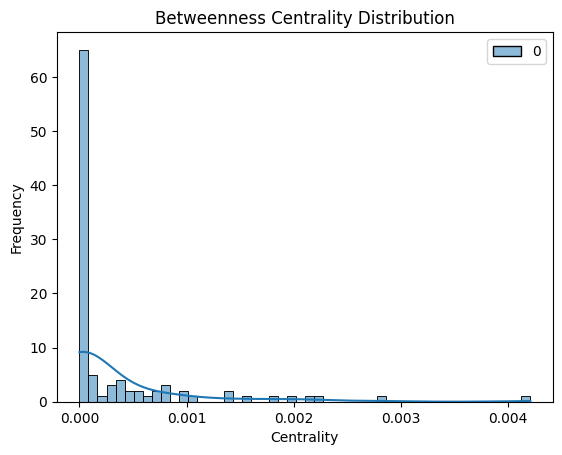

In [22]:
# c & d) Compute centralities and plot distributions
centralities = {
    "Degree Centrality": nx.degree_centrality(G),
    "Eigenvector Centrality": nx.eigenvector_centrality(G, max_iter=1000),
    "PageRank": nx.pagerank(G),
    "Closeness Centrality": nx.closeness_centrality(G),
    "Betweenness Centrality": nx.betweenness_centrality(G)
}

for name, values in centralities.items():
    plt.figure()
    sns.histplot(values.values(), bins=50, kde=True)
    plt.title(f"{name} Distribution")
    plt.xlabel("Centrality")
    plt.ylabel("Frequency")
    plt.show()

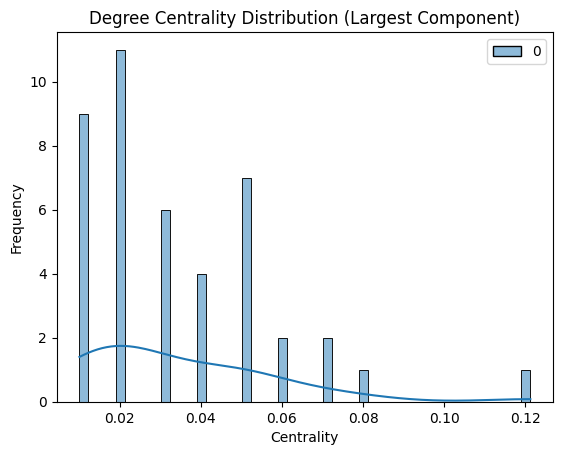

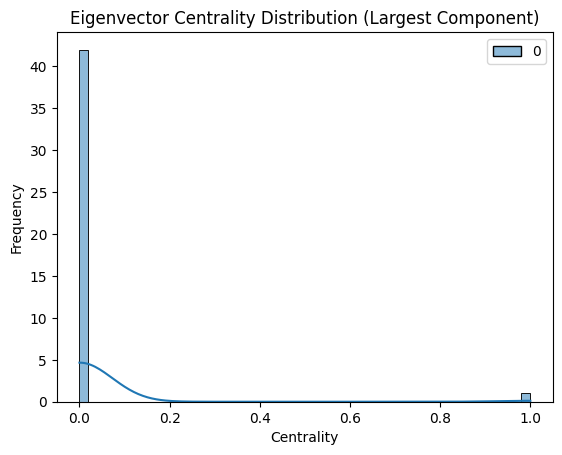

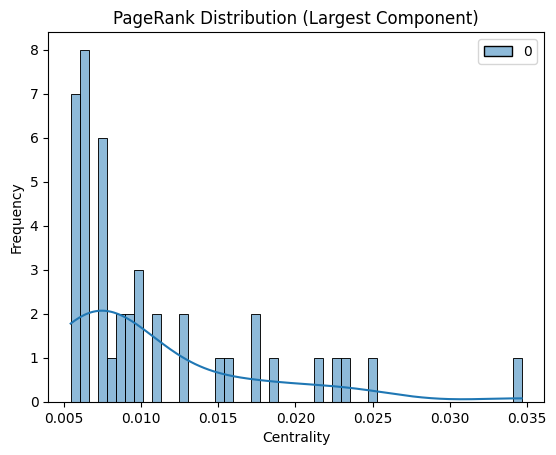

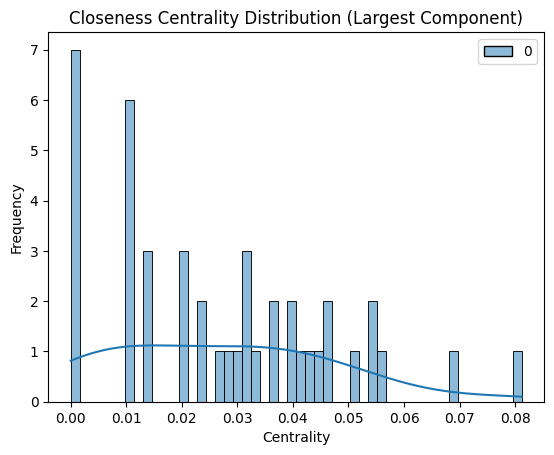

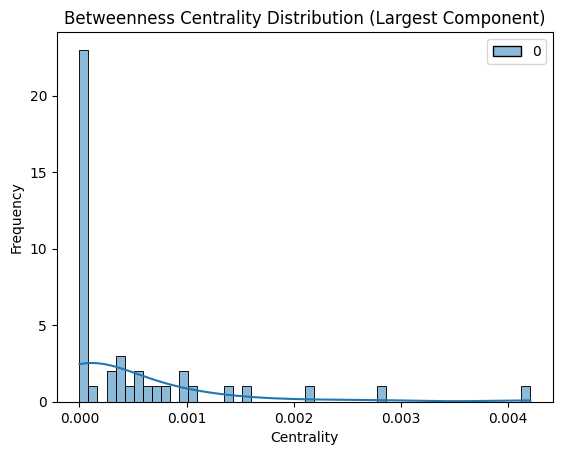

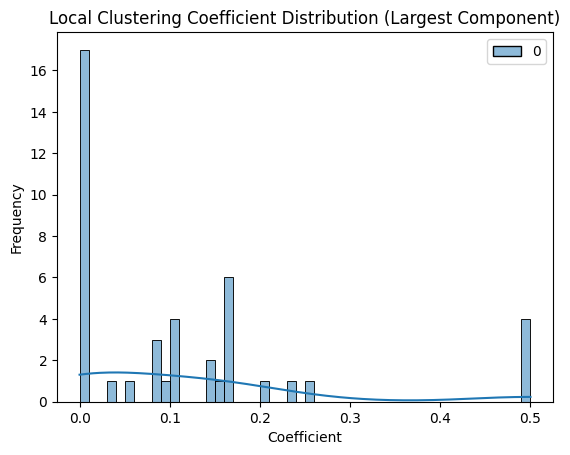

Global Clustering Coefficient: 0.15384615384615385
Is the graph bipartite? False


In [23]:
# e) Repeat for largest component
for name, values in centralities.items():
    largest_values = {k: v for k, v in values.items() if k in G_largest.nodes}
    plt.figure()
    sns.histplot(largest_values.values(), bins=50, kde=True)
    plt.title(f"{name} Distribution (Largest Component)")
    plt.xlabel("Centrality")
    plt.ylabel("Frequency")
    plt.show()

# f) Local clustering coefficient distribution for largest component
clustering_coefficients = nx.clustering(G_largest)
plt.figure()
sns.histplot(clustering_coefficients.values(), bins=50, kde=True)
plt.title("Local Clustering Coefficient Distribution (Largest Component)")
plt.xlabel("Coefficient")
plt.ylabel("Frequency")
plt.show()

# g) Global clustering coefficient
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient: {global_clustering}")

# h) Identify bipartite subgraph
is_bipartite = nx.is_bipartite(G)
print(f"Is the graph bipartite? {is_bipartite}")
if is_bipartite:
    top_nodes, bottom_nodes = nx.bipartite.sets(G)
    bipartite_subgraph = G.subgraph(top_nodes | bottom_nodes)
    print(f"Bipartite subgraph has {len(bipartite_subgraph.nodes())} nodes and {len(bipartite_subgraph.edges())} edges.")


## Question 2: Facebook dataset

In [ ]:
G = nx.read_edgelist("Facebook dataset/facebook_combined.txt", nodetype=int)

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

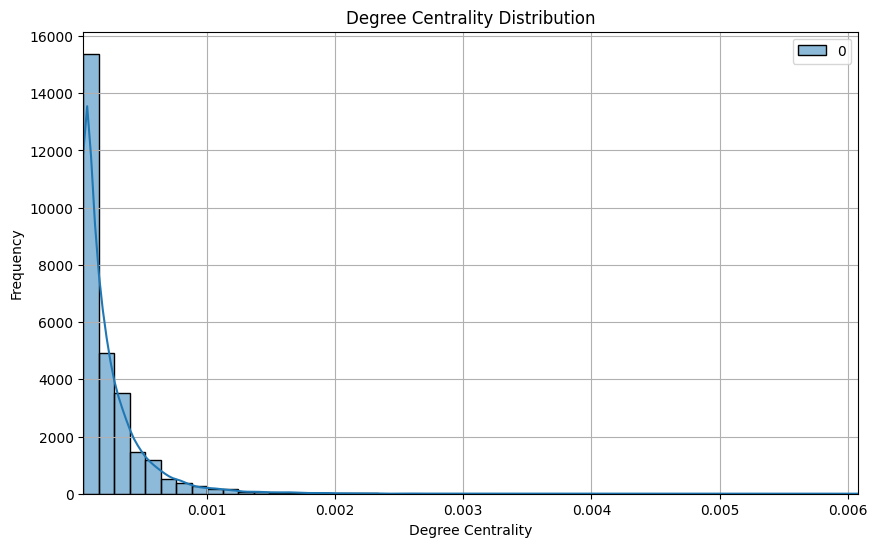

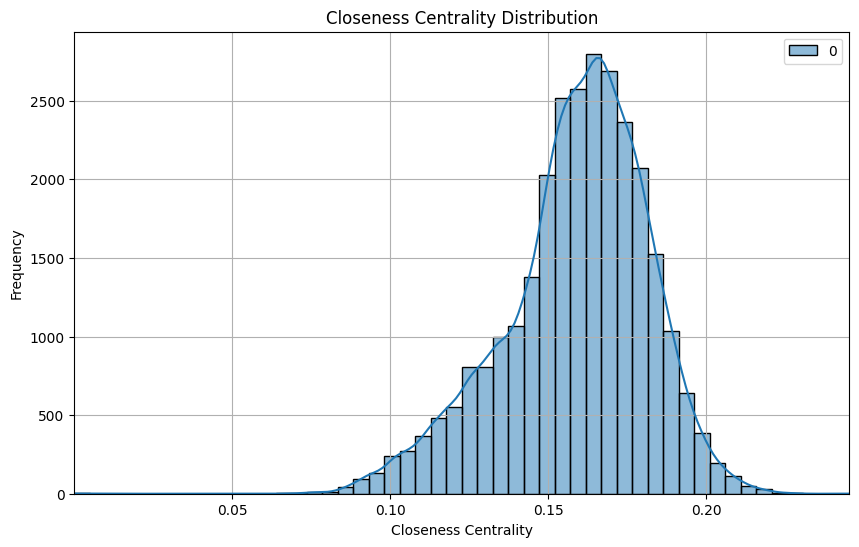

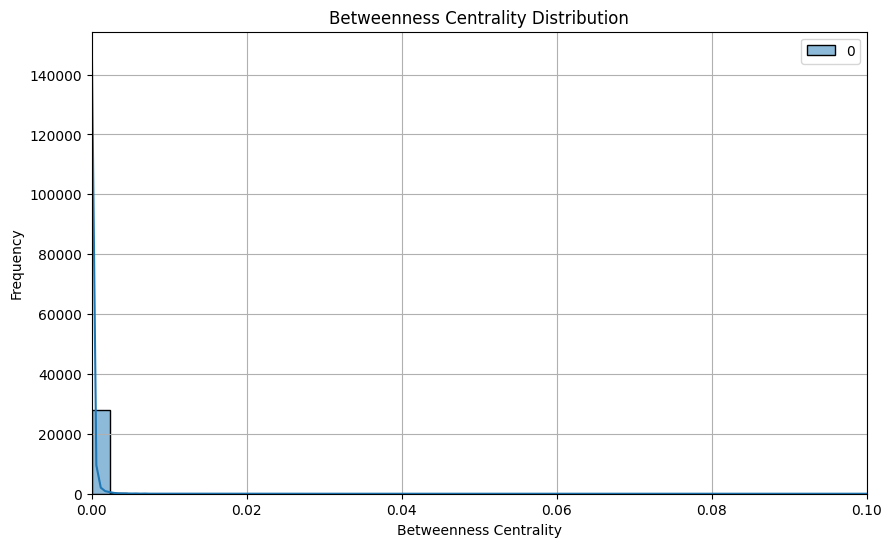

In [ ]:
def plot_histogram(data, title, xlabel, bins=50, x_min=None, x_max=None):
    plt.figure(figsize=(10, 6))
    sns.histplot(data.values(), bins=50, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)
    else:
        plt.xlim(min(data.values()), max(data.values()))
    plt.grid()
    plt.show()

plot_histogram(degree_centrality, "Degree Centrality Distribution", "Degree Centrality", 100)
plot_histogram(closeness_centrality, "Closeness Centrality Distribution", "Closeness Centrality", 100)
plot_histogram(betweenness_centrality, "Betweenness Centrality Distribution", "Betweenness Centrality", 100, 0, 0.1)

b, Calculates the shortest distance between node (s) of highest centrality score and node (s) of second highest centrality score (for both degree, closeness, in-betweeness centraility measures)

In [ ]:
def shortest_distance(centralities, name):
    distances = []
    sorted_nodes = sorted(centralities.items(), key=lambda x: x[1], reverse=True)
    top_node, second_top_node = sorted_nodes[0][0], sorted_nodes[1][0]
    try:
        shortest_distance = nx.shortest_path_length(G, source=top_node, target=second_top_node)
        print(f"Shortest distance between {top_node} and {second_top_node} of {name}: {shortest_distance}")
        print(f"Highest score: {centralities[top_node]:.4f}, second highest score: {centralities[second_top_node]:.4f}")
    except nx.NetworkXNoPath:
        print(f"No path between {top_node} and {second_top_node}")

shortest_distance(degree_centrality, "Degree Centrality")
shortest_distance(closeness_centrality, "Closeness Centrality")
shortest_distance(betweenness_centrality, "Betweenness Centrality")

Shortest distance between 867 and 396 of Degree Centrality: 2
Highest score: 0.0061, second highest score: 0.0054
Shortest distance between 14771 and 2518 of Closeness Centrality: 1
Highest score: 0.2452, second highest score: 0.2277
Shortest distance between 14771 and 11987 of Betweenness Centrality: 1
Highest score: 0.1138, second highest score: 0.0275


c, Displays the subgraph where the nodes are most connected (in terms of degree centrality).. Can use your own reasoning for this issue

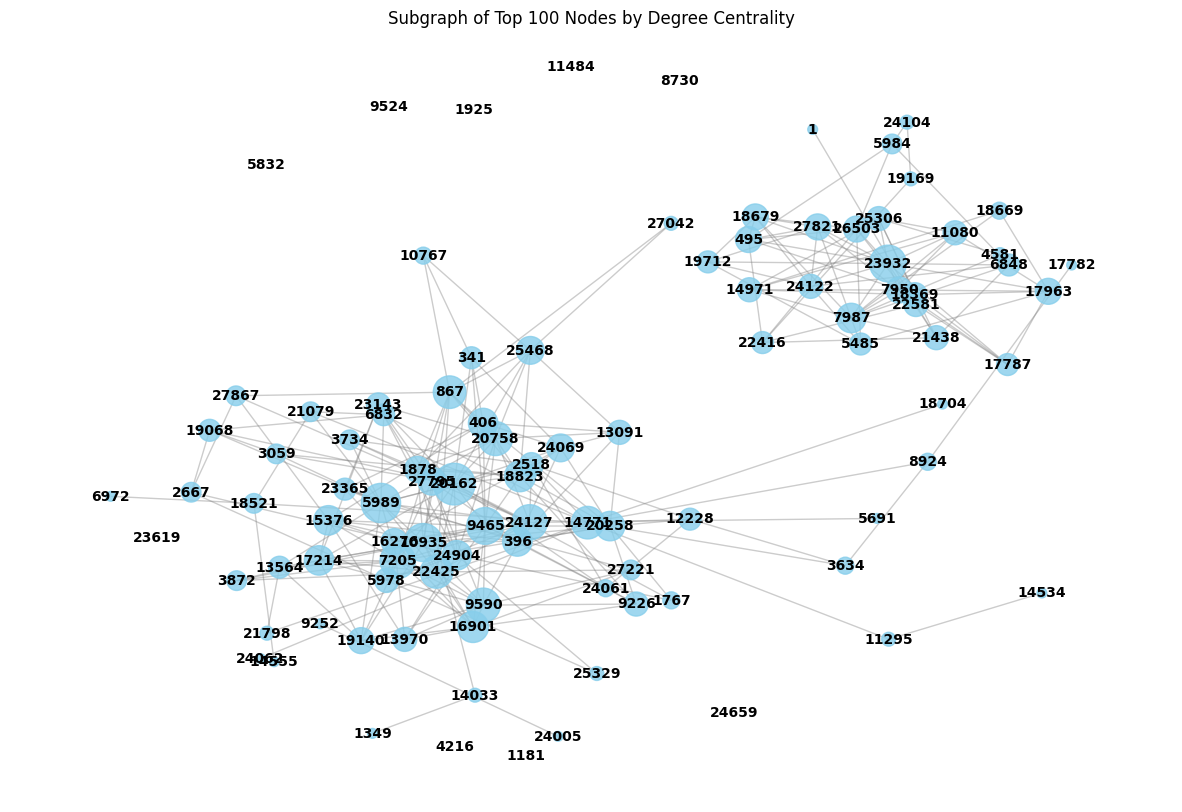

In [ ]:
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Select top N nodes (adjust N as needed)
top_n = 100
top_nodes = sorted_nodes[:top_n]

# Create subgraph of the top nodes
subgraph = G.subgraph(top_nodes)

# Calculate node sizes proportional to their degrees
degrees = dict(subgraph.degree())
node_sizes = [degrees[n] * 50 for n in subgraph.nodes()]  # Scale for visibility

# Plot the subgraph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgraph, k=0.5, iterations=50)  # Layout for visualization
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(subgraph, pos, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_weight='bold')

plt.title(f"Subgraph of Top {top_n} Nodes by Degree Centrality")
plt.axis('off')
plt.show()

d, Calculates the local clustering coefficients and the shortest distance among the nodes with highest and second highest clustering coefficient.

In [ ]:
clustering_coeffs = nx.clustering(G)

sorted_coeffs = sorted(set(clustering_coeffs.values()), reverse=True)

if len(sorted_coeffs) < 2:
    print("Not enough distinct clustering coefficients to compare.")
else:
    # Get nodes with highest and second-highest clustering coefficients
    highest_coeff = sorted_coeffs[0]
    second_highest_coeff = sorted_coeffs[1]

    highest_nodes = [n for n, c in clustering_coeffs.items() if c == highest_coeff]
    second_highest_nodes = [n for n, c in clustering_coeffs.items() if c == second_highest_coeff]

    # Compute shortest path lengths between all pairs
    min_distance = None
    for u in highest_nodes:
        for v in second_highest_nodes:
            distance = nx.shortest_path_length(G, u, v)
            if min_distance is None or distance < min_distance:
                min_distance = distance

    print(f"Shortest distance between nodes with highest and second-highest clustering coefficients: {min_distance}")

Shortest distance between nodes with highest and second-highest clustering coefficients: 2


Calculating best minimal value for power law fit


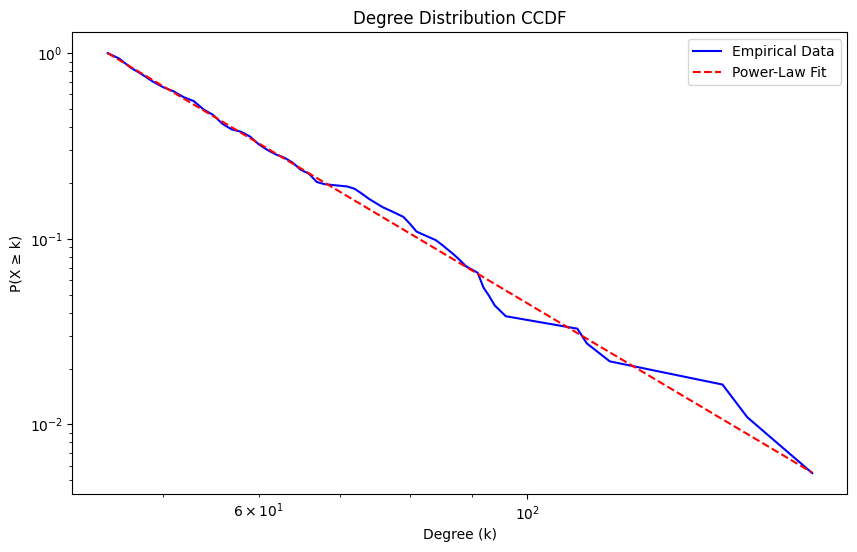

Power-Law Parameters:
  Scaling exponent (α): 4.857
  Minimum degree (x_min): 45.0
  Kolmogorov-Smirnov distance: 0.025


In [ ]:
import powerlaw

# Extract the degree sequence (exclude degree=0 if any)
degrees = [d for n, d in G.degree() if d > 0]

# Fit power-law distribution
fit = powerlaw.Fit(degrees, discrete=True)

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the CCDF of the data and the power-law fit on the same axis
fit.plot_ccdf(ax=ax, label='Empirical Data', color='b')
fit.power_law.plot_ccdf(ax=ax, linestyle='--', color='r', label='Power-Law Fit')

# Customize the plot
ax.set_title("Degree Distribution CCDF")
ax.set_xlabel("Degree (k)")
ax.set_ylabel("P(X ≥ k)")
ax.legend()

# Display the plot
plt.show()

# Output power-law parameters
print("Power-Law Parameters:")
print(f"  Scaling exponent (α): {fit.power_law.alpha:.3f}")
print(f"  Minimum degree (x_min): {fit.power_law.xmin}")
print(f"  Kolmogorov-Smirnov distance: {fit.power_law.D:.3f}")